<a href="https://colab.research.google.com/github/Fahad-Blog/Data-Science-Portfolio/blob/main/Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Cartoon of telecom customers](IMG_8811.png)


The telecommunications (telecom) sector in India is rapidly changing, with more and more telecom businesses being created and many customers deciding to switch between providers. "Churn" refers to the process where customers or subscribers stop using a company's services or products. Understanding the factors that influence keeping a customer as a client in predicting churn is crucial for telecom companies to enhance their service quality and customer satisfaction. As the data scientist on this project, you aim to explore the intricate dynamics of customer behavior and demographics in the Indian telecom sector in predicting customer churn, utilizing two comprehensive datasets from four major telecom partners: Airtel, Reliance Jio, Vodafone, and BSNL:

- `telecom_demographics.csv` contains information related to Indian customer demographics:

| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| `customer_id `         | Unique identifier for each customer.             |
| `telecom_partner `     | The telecom partner associated with the customer.|
| `gender `              | The gender of the customer.                      |
| `age `                 | The age of the customer.                         |
| `state`                | The Indian state in which the customer is located.|
| `city`                 | The city in which the customer is located.       |
| `pincode`              | The pincode of the customer's location.          |
| `registration_event` | When the customer registered with the telecom partner.|
| `num_dependents`      | The number of dependents (e.g., children) the customer has.|
| `estimated_salary`     | The customer's estimated salary.                 |

- `telecom_usage` contains information about the usage patterns of Indian customers:

| Variable   | Description                                                  |
|------------|--------------------------------------------------------------|
| `customer_id` | Unique identifier for each customer.                         |
| `calls_made` | The number of calls made by the customer.                    |
| `sms_sent`   | The number of SMS messages sent by the customer.             |
| `data_used`  | The amount of data used by the customer.                     |
| `churn`    | Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).|


In [3]:
# Import libraries and methods/functions
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Start your code here!

In [4]:
demographics = pd.read_csv('/telecom_demographics.csv')
usage = pd.read_csv('/telecom_usage.csv')

In [5]:
churn_df = demographics.merge(usage,on='customer_id',how = 'left')
churn_df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,15169,Airtel,F,26,Himachal Pradesh,Delhi,667173,2020-03-16,4,85979,75,21,4532,1
1,149207,Airtel,F,74,Uttarakhand,Hyderabad,313997,2022-01-16,0,69445,35,38,723,1
2,148119,Airtel,F,54,Jharkhand,Chennai,549925,2022-01-11,2,75949,70,47,4688,1
3,187288,Reliance Jio,M,29,Bihar,Hyderabad,230636,2022-07-26,3,34272,95,32,10241,1
4,14016,Vodafone,M,45,Nagaland,Bangalore,188036,2020-03-11,4,34157,66,23,5246,1


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
 10  calls_made          6500 non-null   int64 
 11  sms_sent            6500 non-null   int64 
 12  data_used           6500 non-null   int64 
 13  churn               6500 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 711.1+ KB


In [7]:
churn_df['registration_event'] = pd.to_datetime(churn_df['registration_event'])
churn_df['registration_year'] = churn_df['registration_event'].dt.year
churn_df['registration_month'] = churn_df['registration_event'].dt.month
drop_col = ['registration_event','pincode']
churn_df.drop(drop_col,inplace= True, axis=1)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   num_dependents      6500 non-null   int64 
 7   estimated_salary    6500 non-null   int64 
 8   calls_made          6500 non-null   int64 
 9   sms_sent            6500 non-null   int64 
 10  data_used           6500 non-null   int64 
 11  churn               6500 non-null   int64 
 12  registration_year   6500 non-null   int32 
 13  registration_month  6500 non-null   int32 
dtypes: int32(2), int64(8), object(4)
memory usage: 660.3+ KB


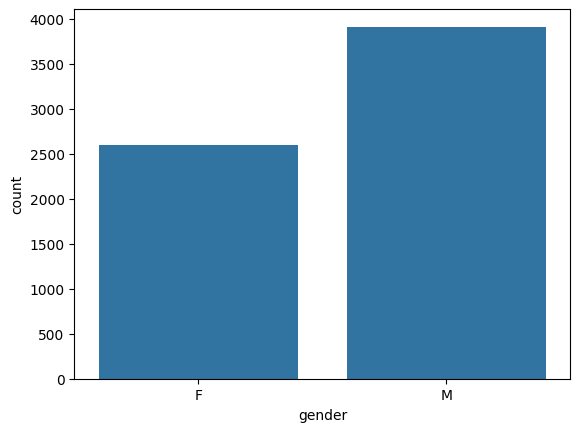

In [8]:
#EDA on gender distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'gender', data = churn_df)
plt.show()

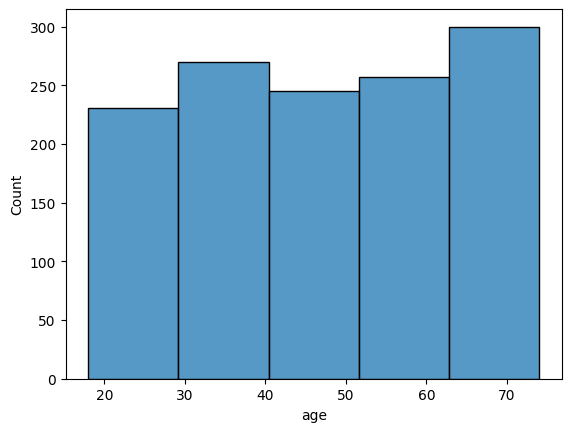

In [9]:
sns.histplot(x = 'age', data=churn_df[churn_df['churn']==1], bins=5)
plt.show()

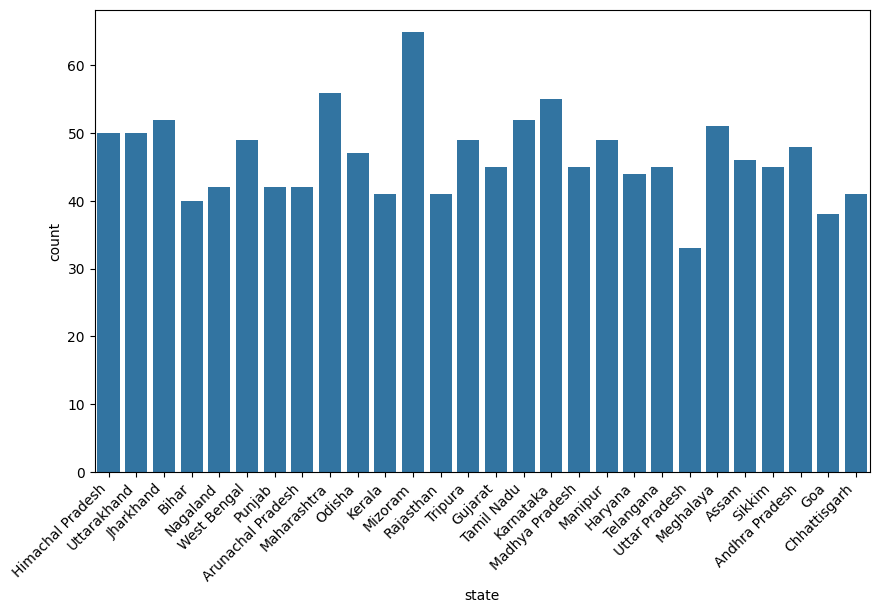

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='state',data=churn_df[churn_df['churn']==1])
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   num_dependents      6500 non-null   int64 
 7   estimated_salary    6500 non-null   int64 
 8   calls_made          6500 non-null   int64 
 9   sms_sent            6500 non-null   int64 
 10  data_used           6500 non-null   int64 
 11  churn               6500 non-null   int64 
 12  registration_year   6500 non-null   int32 
 13  registration_month  6500 non-null   int32 
dtypes: int32(2), int64(8), object(4)
memory usage: 660.3+ KB


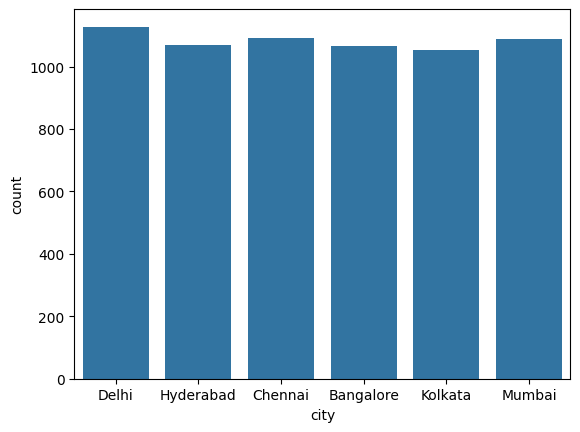

In [12]:
sns.countplot(x = 'city', data = churn_df)
plt.show()

In [13]:
demographics.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary
0,15169,Airtel,F,26,Himachal Pradesh,Delhi,667173,2020-03-16,4,85979
1,149207,Airtel,F,74,Uttarakhand,Hyderabad,313997,2022-01-16,0,69445
2,148119,Airtel,F,54,Jharkhand,Chennai,549925,2022-01-11,2,75949
3,187288,Reliance Jio,M,29,Bihar,Hyderabad,230636,2022-07-26,3,34272
4,14016,Vodafone,M,45,Nagaland,Bangalore,188036,2020-03-11,4,34157


In [14]:
cat_col = ['telecom_partner','gender','state']
X = churn_df.drop(['churn','customer_id','city'],axis=1)
target = churn_df['churn']
X = pd.get_dummies(X,columns=cat_col,drop_first=True)
X.head()

,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,registration_year,registration_month,telecom_partner_BSNL,telecom_partner_Reliance Jio,...,state_Odisha,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal
0,26,4,85979,75,21,4532,2020,3,False,False,...,False,False,False,False,False,False,False,False,False,False
1,74,0,69445,35,38,723,2022,1,False,False,...,False,False,False,False,False,False,False,False,True,False
2,54,2,75949,70,47,4688,2022,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,29,3,34272,95,32,10241,2022,7,False,True,...,False,False,False,False,False,False,False,False,False,False
4,45,4,34157,66,23,5246,2020,3,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)


In [16]:
X_train,X_test,y_train,y_test = train_test_split(features_scaled,target,train_size=0.8,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
logreg_pred = lr.predict(X_test)
logreg_cf = confusion_matrix(y_test,logreg_pred)
print(logreg_cf)
print(classification_report(y_test,logreg_pred))
print(accuracy_score(logreg_pred,y_test))

[[1027    0]
 [ 273    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1027
           1       0.00      0.00      0.00       273

    accuracy                           0.79      1300
   macro avg       0.40      0.50      0.44      1300
weighted avg       0.62      0.79      0.70      1300

0.79


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_cf = confusion_matrix(y_test,rf_pred)
print(rf_cf)
print(classification_report(y_test,rf_pred))
print(accuracy_score(rf_pred,y_test))

[[1027    0]
 [ 273    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1027
           1       0.00      0.00      0.00       273

    accuracy                           0.79      1300
   macro avg       0.40      0.50      0.44      1300
weighted avg       0.62      0.79      0.70      1300

0.79


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
Conclusion = "Both the models are showing same accuracy of 79%"